# Query Recommendation Evaluation

In [12]:
import copy
import os

import matplotlib.pyplot as plt

from dataLoad import *
from dataProcessing import *
from evaluation import *

### Loading User Set and Utility Matrix

In [13]:
userIDs_small = loadUserSet()
queryIDs_small, utilityMatrix_small, average_small = loadUtilityMatrix()

userSetPath_medium_user = os.path.join(DATA_PATH, "mediumDatasets", "double_the_userSet", "userSet.csv")
utilityPath_medium_user = os.path.join(DATA_PATH, "mediumDatasets", "double_the_userSet", "utilityMatrix.csv")
userIDs_medium_user = loadUserSet(userSetPath_medium_user)
queryIDs_medium_user, utilityMatrix_medium_user, average_medium_user = loadUtilityMatrix(utilityPath_medium_user)

userSetPath_medium_query = os.path.join(DATA_PATH, "mediumDatasets", "double_the_querySet", "userSet.csv")
utilityPath_medium_query = os.path.join(DATA_PATH, "mediumDatasets", "double_the_querySet", "utilityMatrix.csv")
userIDs_medium_query = loadUserSet(userSetPath_medium_query)
queryIDs_medium_query, utilityMatrix_medium_query, average_medium_query = loadUtilityMatrix(utilityPath_medium_query)

userSetPath_large_user = os.path.join(DATA_PATH, "largeDatasets", "quadruple_the_userSet", "userSet.csv")
utilityPath_large_user = os.path.join(DATA_PATH, "largeDatasets", "quadruple_the_userSet", "utilityMatrix.csv")
userIDs_large_user = loadUserSet(userSetPath_large_user)
queryIDs_large_user, utilityMatrix_large_user, average_large_user = loadUtilityMatrix(utilityPath_large_user)

userSetPath_large_query = os.path.join(DATA_PATH, "largeDatasets", "quadruple_the_querySet", "userSet.csv")
utilityPath_large_query = os.path.join(DATA_PATH, "largeDatasets", "quadruple_the_querySet", "utilityMatrix.csv")
userIDs_large_query = loadUserSet(userSetPath_large_query)
queryIDs_large_query, utilityMatrix_large_query, average_large_query = loadUtilityMatrix(utilityPath_large_query)

### Getting Liked and Disliked Queries
In `userQueryLikedDict` and `userQueryDislikedDict`  the key is the User ID and the value is a list of query IDs that each user liked / disliked.
In `queryUserLikedDict` and `queryUserLikedDict` the key is the Query ID and the value is a list of User IDs who liked / disliked the query.

In [14]:
(
    userQueryLikedDict_small,
    userQueryDislikedDict_small,
    queryUserLikedDict_small,
    queryUserDislikedDict_small
) = generateLikedDislikedDictionary(
    userIDs_small, queryIDs_small, utilityMatrix_small, average_small
)

(
    userQueryLikedDict_medium_user,
    userQueryDislikedDict_medium_user,
    queryUserLikedDict_medium_user,
    queryUserDislikedDict_medium_user
) = generateLikedDislikedDictionary(
    userIDs_medium_user,
    queryIDs_medium_user,
    utilityMatrix_medium_user,
    average_medium_user
)

(
    userQueryLikedDict_medium_query,
    userQueryDislikedDict_medium_query,
    queryUserLikedDict_medium_query,
    queryUserDislikedDict_medium_query
) = generateLikedDislikedDictionary(
    userIDs_medium_query,
    queryIDs_medium_query,
    utilityMatrix_medium_query,
    average_medium_query
)

(
    userQueryLikedDict_large_user,
    userQueryDislikedDict_large_user,
    queryUserLikedDict_large_user,
    queryUserDislikedDict_large_user
) = generateLikedDislikedDictionary(
    userIDs_large_user,
    queryIDs_large_user,
    utilityMatrix_large_user,
    average_large_user
)

(
    userQueryLikedDict_large_query,
    userQueryDislikedDict_large_query,
    queryUserLikedDict_large_query,
    queryUserDislikedDict_large_query
) = generateLikedDislikedDictionary(
    userIDs_large_query,
    queryIDs_large_query,
    utilityMatrix_large_query,
    average_large_query
)

### Calculating the Similarity of Users and Queries with Jaccard Similarity

In [15]:
userSimilarity_small = jaccardSimilarity(
    userQueryLikedDict_small,
    userQueryDislikedDict_small,
    userIDs_small
)
querySimilarity_small = jaccardSimilarity(
    queryUserLikedDict_small,
    queryUserDislikedDict_small,
    queryIDs_small
)

userSimilarity_medium_user = jaccardSimilarity(
    userQueryLikedDict_medium_user,
    userQueryDislikedDict_medium_user,
    userIDs_medium_user
)
querySimilarity_medium_user = jaccardSimilarity(
    queryUserLikedDict_medium_user,
    queryUserDislikedDict_medium_user,
    queryIDs_medium_user
)

userSimilarity_medium_query = jaccardSimilarity(
    userQueryLikedDict_medium_query,
    userQueryDislikedDict_medium_query,
    userIDs_medium_query
)
querySimilarity_medium_query = jaccardSimilarity(
    queryUserLikedDict_medium_query,
    queryUserDislikedDict_medium_query,
    queryIDs_medium_query
)

userSimilarity_large_user = jaccardSimilarity(
    userQueryLikedDict_large_user,
    userQueryDislikedDict_large_user,
    userIDs_large_user
)
querySimilarity_large_user = jaccardSimilarity(
    queryUserLikedDict_large_user,
    queryUserDislikedDict_large_user,
    queryIDs_large_user
)

userSimilarity_large_query = jaccardSimilarity(
    userQueryLikedDict_large_query,
    userQueryDislikedDict_large_query,
    userIDs_large_query
)
querySimilarity_large_query = jaccardSimilarity(
    queryUserLikedDict_large_query,
    queryUserDislikedDict_large_query,
    queryIDs_large_query
)

### Getting 20% of the already rated queries for evaluation

In [16]:
seed = 10

evaluation_small = getQueriesForEvaluation(
    utilityMatrix_small,
    removeFromUtilityMatrix=True,
    percentage=0.2,
    seed=seed
)
queriesToEvaluate_small = prepareQueriesForPrediction(evaluation_small)

evaluation_medium_user = getQueriesForEvaluation(
    utilityMatrix_medium_user,
    removeFromUtilityMatrix=True,
    percentage=0.2,
    seed=seed
)
queriesToEvaluate_medium_user = prepareQueriesForPrediction(evaluation_medium_user)

evaluation_medium_query = getQueriesForEvaluation(
    utilityMatrix_medium_query,
    removeFromUtilityMatrix=True,
    percentage=0.2,
    seed=seed
)
queriesToEvaluate_medium_query = prepareQueriesForPrediction(evaluation_medium_query)

evaluation_large_user = getQueriesForEvaluation(
    utilityMatrix_large_user,
    removeFromUtilityMatrix=True,
    percentage=0.2,
    seed=seed
)
queriesToEvaluate_large_user = prepareQueriesForPrediction(evaluation_large_user)

evaluation_large_query = getQueriesForEvaluation(
    utilityMatrix_large_query,
    removeFromUtilityMatrix=True,
    percentage=0.2,
    seed=seed
)
queriesToEvaluate_large_query = prepareQueriesForPrediction(evaluation_large_query)

### Preparing a function to fill predictions
This function is used to fill the prediction of the queries that could not
be predicted. In this specific example average rating of user will be placed.

In [17]:
fillWithAvg = lambda user, query, average: average[user]
fillPredictions_small = lambda user, query: fillWithAvg(user, query, average_small)
fillPredictions_medium_user = lambda user, query: fillWithAvg(user, query, average_medium_user)
fillPredictions_medium_query = lambda user, query: fillWithAvg(user, query, average_medium_query)
fillPredictions_large_user = lambda user, query: fillWithAvg(user, query, average_large_user)
fillPredictions_large_query = lambda user, query: fillWithAvg(user, query, average_large_query)

### Make Predictions with Query Based Collaborative Filering

In [18]:
topNQueries = 4
query_cf_predictions_small = queryBasedCF(utilityMatrix_small, queriesToEvaluate_small, querySimilarity_small, topNQueries, fillNotPredictable=fillPredictions_small)

topNQueries = 4
query_cf_predictions_medium_user = queryBasedCF(utilityMatrix_medium_user, queriesToEvaluate_medium_user, querySimilarity_medium_user, topNQueries, fillNotPredictable=fillPredictions_medium_user)

topNQueries = 4
query_cf_predictions_medium_query = queryBasedCF(utilityMatrix_medium_query, queriesToEvaluate_medium_query, querySimilarity_medium_query, topNQueries, fillNotPredictable=fillPredictions_medium_query)

topNQueries = 4
query_cf_predictions_large_user = queryBasedCF(utilityMatrix_large_user, queriesToEvaluate_large_user, querySimilarity_large_user, topNQueries, fillNotPredictable=fillPredictions_large_user)

topNQueries = 4
query_cf_predictions_large_query = queryBasedCF(utilityMatrix_large_query, queriesToEvaluate_large_query, querySimilarity_large_query, topNQueries, fillNotPredictable=fillPredictions_large_query)

Not able to predict 0 ratings
Not able to predict 0 ratings
Not able to predict 0 ratings
Not able to predict 0 ratings
Not able to predict 0 ratings


### Make Predictions with User Based Collaborative Filtering

In [19]:
topNUsers = 4
user_cf_predictions_small = userBasedCF(utilityMatrix_small, queriesToEvaluate_small, userSimilarity_small, topNUsers, fillNotPredictable=fillPredictions_small)

topNUsers = 4
user_cf_predictions_medium_user = userBasedCF(utilityMatrix_medium_user, queriesToEvaluate_medium_user, userSimilarity_medium_user, topNUsers, fillNotPredictable=fillPredictions_medium_user)

topNUsers = 4
user_cf_predictions_medium_query = userBasedCF(utilityMatrix_medium_query, queriesToEvaluate_medium_query, userSimilarity_medium_query, topNUsers, fillNotPredictable=fillPredictions_medium_query)

topNUsers = 4
user_cf_predictions_large_user = userBasedCF(utilityMatrix_large_user, queriesToEvaluate_large_user, userSimilarity_large_user, topNUsers, fillNotPredictable=fillPredictions_large_user)

topNUsers = 4
user_cf_predictions_large_query = userBasedCF(utilityMatrix_large_query, queriesToEvaluate_large_query, userSimilarity_large_query, topNUsers, fillNotPredictable=fillPredictions_large_query)

Not able to predict 0 ratings
Not able to predict 0 ratings
Not able to predict 0 ratings
Not able to predict 0 ratings
Not able to predict 0 ratings


### Making the Predictions and Actual values flat

In [20]:
flat_user_cf_predictions_small, actual_user_cf_small = getPredictionsAndActualRatings(user_cf_predictions_small, evaluation_small)
flat_query_cf_predictions_small, actual_query_cf_small = getPredictionsAndActualRatings(query_cf_predictions_small, evaluation_small)

flat_user_cf_predictions_medium_user, actual_user_cf_medium_user = getPredictionsAndActualRatings(user_cf_predictions_medium_user, evaluation_medium_user)
flat_query_cf_predictions_medium_user, actual_query_cf_medium_user = getPredictionsAndActualRatings(query_cf_predictions_medium_user, evaluation_medium_user)

flat_user_cf_predictions_medium_query, actual_user_cf_medium_query = getPredictionsAndActualRatings(user_cf_predictions_medium_query, evaluation_medium_query)
flat_query_cf_predictions_medium_query, actual_query_cf_medium_query = getPredictionsAndActualRatings(query_cf_predictions_medium_query, evaluation_medium_query)

flat_user_cf_predictions_large_user, actual_user_cf_large_user = getPredictionsAndActualRatings(user_cf_predictions_large_user, evaluation_large_user)
flat_query_cf_predictions_large_user, actual_query_cf_large_user = getPredictionsAndActualRatings(query_cf_predictions_large_user, evaluation_large_user)

flat_user_cf_predictions_large_query, actual_user_cf_large_query = getPredictionsAndActualRatings(user_cf_predictions_large_query, evaluation_large_query)
flat_query_cf_predictions_large_query, actual_query_cf_large_query = getPredictionsAndActualRatings(query_cf_predictions_large_query, evaluation_large_query)

# Suggest the top k most interesting queries not posed yet by the user

In [22]:
userRetrievingSuggestions = 120
howManySuggestions = 5
suggestions = topKQueriesNotPosed(user_cf_predictions_small,userRetrievingSuggestions,howManySuggestions)
print("User-based CF suggestions", suggestions)

suggestions = topKQueriesNotPosed(query_cf_predictions_small,userRetrievingSuggestions,howManySuggestions)
print("Query-based CF suggestions", suggestions)


User-based CF suggestions [('226', 85.10254488783089), ('206', 84.02494738319069), ('188', 83.18636940712973), ('79', 81.9756828801396), ('233', 80.13200863802153)]
Query-based CF suggestions [('226', 93.25672822857344), ('233', 91.62973042064948), ('206', 79.91765572104265), ('188', 78.53136997888772), ('79', 76.8716398554387)]


### Calculating RMSE

In [21]:
user_cf_rmse_small = rootMeanSquaredError(flat_user_cf_predictions_small, actual_user_cf_small)
query_cf_rmse_small = rootMeanSquaredError(flat_query_cf_predictions_small, actual_query_cf_small)

user_cf_rmse_medium_user = rootMeanSquaredError(flat_user_cf_predictions_medium_user, actual_user_cf_medium_user)
query_cf_rmse_medium_user = rootMeanSquaredError(flat_query_cf_predictions_medium_user, actual_query_cf_medium_user)

user_cf_rmse_medium_query = rootMeanSquaredError(flat_user_cf_predictions_medium_query, actual_user_cf_medium_query)
query_cf_rmse_medium_query = rootMeanSquaredError(flat_query_cf_predictions_medium_query, actual_query_cf_medium_query)

user_cf_rmse_large_user = rootMeanSquaredError(flat_user_cf_predictions_large_user, actual_user_cf_large_user)
query_cf_rmse_large_user = rootMeanSquaredError(flat_query_cf_predictions_large_user, actual_query_cf_large_user)

user_cf_rmse_large_query = rootMeanSquaredError(flat_user_cf_predictions_large_query, actual_user_cf_large_query)
query_cf_rmse_large_query = rootMeanSquaredError(flat_query_cf_predictions_large_query, actual_query_cf_large_query)

print("User-based CF small: ", user_cf_rmse_small)
print("Query-based CF small: ", query_cf_rmse_small)

print("User-based CF medium user: ", user_cf_rmse_medium_user)
print("Query-based CF medium user: ", query_cf_rmse_medium_user)

print("User-based CF medium query: ", user_cf_rmse_medium_query)
print("Query-based CF medium query: ", query_cf_rmse_medium_query)

print("User-based CF large user: ", user_cf_rmse_large_user)
print("Query-based CF large user: ", query_cf_rmse_large_user)

print("User-based CF large query: ", user_cf_rmse_large_query)
print("Query-based CF large query: ", query_cf_rmse_large_query)

User-based CF small:  21.04544491839309
Query-based CF small:  18.458096011208337
User-based CF medium user:  20.696056378179158
Query-based CF medium user:  19.770860582325245
User-based CF medium query:  21.74378500314639
Query-based CF medium query:  16.086364942026915
User-based CF large user:  20.736866470123253
Query-based CF large user:  21.11857743836063
User-based CF large query:  21.83470558932111
Query-based CF large query:  15.963296243252408


### Plotting the Results

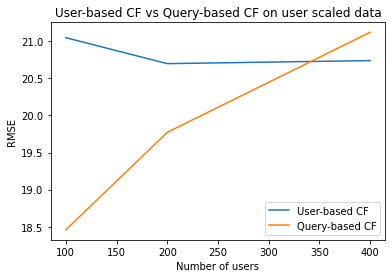

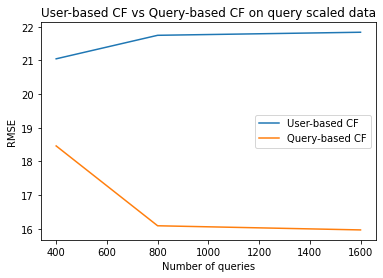

In [11]:
user_based_user_scaled_rmse = [user_cf_rmse_small, user_cf_rmse_medium_user, user_cf_rmse_large_user]
query_based_user_scaled_rmse = [query_cf_rmse_small, query_cf_rmse_medium_user, query_cf_rmse_large_user]

user_based_query_scaled_rmse = [user_cf_rmse_small, user_cf_rmse_medium_query, user_cf_rmse_large_query]
query_based_query_scaled_rmse = [query_cf_rmse_small, query_cf_rmse_medium_query, query_cf_rmse_large_query]

user_size_user_scaled = [len(userIDs_small), len(userIDs_medium_user), len(userIDs_large_user)]
user_size_query_scaled = [len(userIDs_small), len(userIDs_medium_query), len(userIDs_large_query)]

query_size_user_scaled = [len(queryIDs_small), len(queryIDs_medium_user), len(queryIDs_large_user)]
query_size_query_scaled = [len(queryIDs_small), len(queryIDs_medium_query), len(queryIDs_large_query)]

plt.plot(user_size_user_scaled, user_based_user_scaled_rmse, label="User-based CF")
plt.plot(user_size_user_scaled, query_based_user_scaled_rmse, label="Query-based CF")
plt.xlabel("Number of users")
plt.ylabel("RMSE")
plt.title("User-based CF vs Query-based CF on user scaled data")
plt.legend()
# Save plot as a transparent PNG with High DPI
plt.savefig('user_vs_query_user_scaled_transparent.png', dpi=300, transparent=True)
plt.savefig('user_vs_query_user_scaled.png', dpi=300, transparent=False)
plt.show()

plt.plot(query_size_query_scaled, user_based_query_scaled_rmse, label="User-based CF")
plt.plot(query_size_query_scaled, query_based_query_scaled_rmse, label="Query-based CF")
plt.xlabel("Number of queries")
plt.ylabel("RMSE")
plt.title("User-based CF vs Query-based CF on query scaled data")
plt.legend()
# Save plot as a transparent PNG with High DPI
plt.savefig('user_vs_query_query_scaled_transparent.png', dpi=300, transparent=True)
plt.savefig('user_vs_query_query_scaled.png', dpi=300, transparent=False)
plt.show()